### Controller Demo

In [1]:
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import sys
import scipy.stats
import pylab as plt
from IPython import display
import pylab as plt

In [4]:
sys.path.append('../codes')

In [5]:
from VMSfunctions.Chemicals import *
from VMSfunctions.Chromatograms import *
from VMSfunctions.MassSpec import *
from VMSfunctions.Controller import *
from VMSfunctions.Common import *
from VMSfunctions.DataGenerator import *

In [6]:
# set_log_level_warning()
# set_log_level_info()
set_log_level_debug()

We want a notebook that does the following:
1. create a list of chemical
2. create a new mass spec object, takes chemicals
3. create a new controller, takes mass spec
4. write mzml files

Load densities trained on 4 beer data (see [loader_kde](loader_kde.ipynb)).

In [7]:
ps = load_obj('../models/peak_sampler_4_beers.p')

Load chromatogram data exported from R

In [8]:
xcms_output = '../models/beer_ms1_peaks.csv.gz'
cc = ChromatogramCreator(xcms_output)

DEBUG:ChromatogramCreator:Loading 0 chromatograms
../codes\VMSfunctions\Common.py:58: RuntimeWarning:

divide by zero encountered in double_scalars

DEBUG:ChromatogramCreator:Loading 5000 chromatograms
DEBUG:ChromatogramCreator:Loading 10000 chromatograms
DEBUG:ChromatogramCreator:Loading 15000 chromatograms
DEBUG:ChromatogramCreator:Loading 20000 chromatograms
DEBUG:ChromatogramCreator:Loading 25000 chromatograms
DEBUG:ChromatogramCreator:Loading 30000 chromatograms
DEBUG:ChromatogramCreator:Loading 35000 chromatograms
DEBUG:ChromatogramCreator:Loading 40000 chromatograms
DEBUG:ChromatogramCreator:Loading 45000 chromatograms


### Generate some chemicals

In [9]:
hmdb = load_obj('../models/hmdb_compounds.p')

In [10]:
chemicals = ChemicalCreator(ps)

In [11]:
min_ms1_intensity = 2E5
rt_range = [(3*60, 21*60)]
mz_range = [(0, 1000)]
dataset = chemicals.sample(cc, mz_range, rt_range, min_ms1_intensity, 1000, 2, "Known", None, hmdb, 0.1)

DEBUG:ChemicalCreator:1000 ms1 peaks to be created.
DEBUG:ChemicalCreator:i = 0
DEBUG:ChemicalCreator:i = 25
DEBUG:ChemicalCreator:i = 50
DEBUG:ChemicalCreator:i = 75
DEBUG:ChemicalCreator:i = 100
DEBUG:ChemicalCreator:i = 125
DEBUG:ChemicalCreator:i = 150
DEBUG:ChemicalCreator:i = 175
DEBUG:ChemicalCreator:i = 200
DEBUG:ChemicalCreator:i = 225
DEBUG:ChemicalCreator:i = 250
DEBUG:ChemicalCreator:i = 275
DEBUG:ChemicalCreator:i = 300
DEBUG:ChemicalCreator:i = 325
DEBUG:ChemicalCreator:i = 350
DEBUG:ChemicalCreator:i = 375
DEBUG:ChemicalCreator:i = 400
DEBUG:ChemicalCreator:i = 425
DEBUG:ChemicalCreator:i = 450
DEBUG:ChemicalCreator:i = 475
DEBUG:ChemicalCreator:i = 500
DEBUG:ChemicalCreator:i = 525
DEBUG:ChemicalCreator:i = 550
DEBUG:ChemicalCreator:i = 575
DEBUG:ChemicalCreator:i = 600
DEBUG:ChemicalCreator:i = 625
DEBUG:ChemicalCreator:i = 650
DEBUG:ChemicalCreator:i = 675
DEBUG:ChemicalCreator:i = 700
DEBUG:ChemicalCreator:i = 725
DEBUG:ChemicalCreator:i = 750
DEBUG:ChemicalCreator:i

KnownChemical - 'C10H19NS' rt=804.17 max_intensity=1213925.44
[  52190.61328125   47617.96875      70459.734375    235690.15625
  479065.21875     735851.5         306268.4375     1013173.625
 1213777.625       571366.6875      643961.4375      892423.875
  213580.171875    355536.71875     207846.5625       43905.55859375]


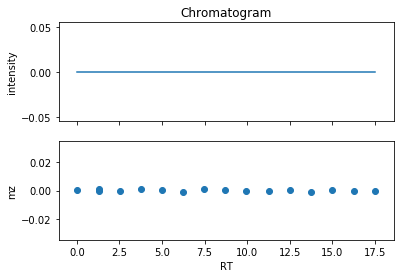

KnownChemical - 'C24H32O5S' rt=366.58 max_intensity=214834.39
[ 58719.87109375  71835.375       35236.24609375 130498.8828125
 102015.5625     154117.109375   159731.6875     120695.46875
 214835.015625  ]


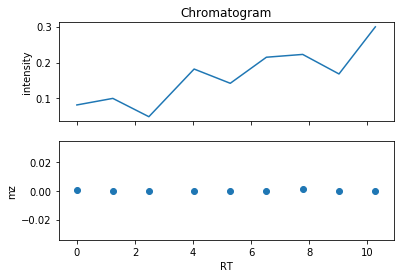

KnownChemical - 'C7H5Cl3O2S' rt=499.51 max_intensity=721559.31
[ 37179.32421875  46674.21484375 323785.5625     490429.90625
 596390.9375     721612.125      582480.4375     540895.
 411003.40625    325527.78125    185076.1875     180228.984375  ]


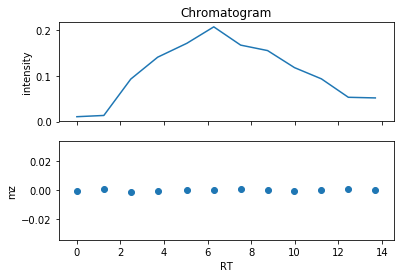

KnownChemical - 'C3H6S5' rt=411.36 max_intensity=287028.12
[ 41666.9296875   29451.44921875 203709.6875     154747.15625
 287028.09375    163515.96875     53044.1015625   75697.0078125 ]


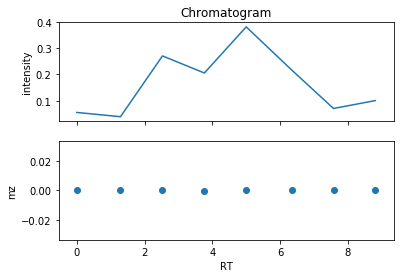

KnownChemical - 'C23H48O2' rt=798.01 max_intensity=202423.12
[ 90249.9765625   78362.7109375   61285.94921875 189736.875
  76757.8046875  119572.84375    202416.34375     86516.9296875
 102513.9296875   93544.21875   ]


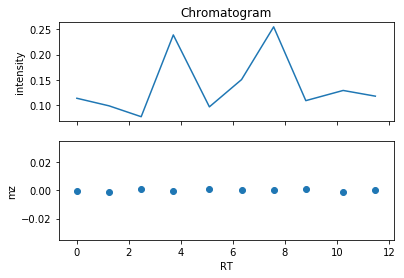

KnownChemical - 'C5H12O11P2' rt=405.51 max_intensity=491959.11
[186560.125    204448.78125  207191.421875 332058.125    338477.40625
 491967.3125   281842.46875  327238.59375  289815.       274391.3125
 193367.15625 ]


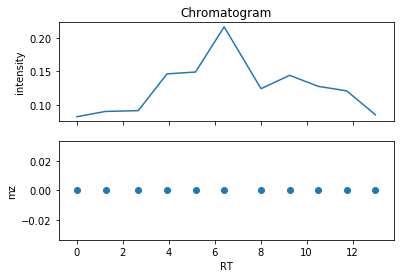

KnownChemical - 'C4H7BrO2S' rt=361.84 max_intensity=641309.70
[508018.65625 544230.3125  540650.3125  641301.125   578663.1875
 348557.375   358304.40625]


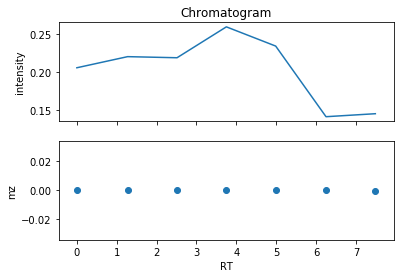

KnownChemical - 'C13H14N2O4' rt=849.29 max_intensity=276192.63
[107691.3359375  155074.953125   130155.9609375  247548.796875
 225984.234375   224787.453125   163816.265625   276192.84375
 149964.84375     63234.98046875 169601.4375    ]


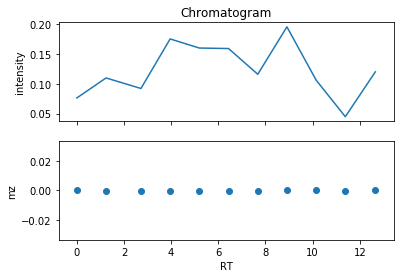

KnownChemical - 'C14H30' rt=388.80 max_intensity=892919.89
[748742.6875 743585.375  809518.0625 821582.375  893036.75   715880.6875
 691782.25   573141.125 ]


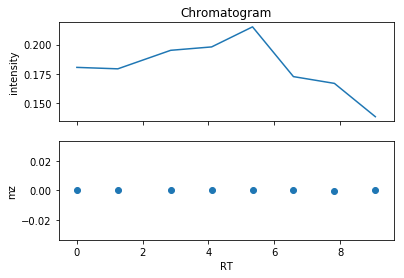

KnownChemical - 'C13H14O12' rt=383.66 max_intensity=218216.37
[ 51295.421875    41241.984375   120738.7109375   44931.24609375
  58296.1171875   33396.02734375  52084.31640625  49575.5078125
  58439.078125   147080.640625   111292.9375     157648.03125
 200153.09375    218213.96875     95171.53125    191318.90625
  33646.65625   ]


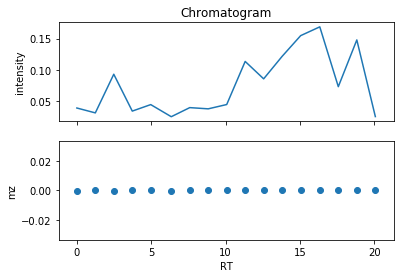

In [12]:
def plot_chromatogram(chrom):
    f, axarr = plt.subplots(2, sharex=True)
    axarr[0].plot(chrom.rts, chrom.intensities)
    axarr[0].set_title('Chromatogram')
    axarr[0].set_ylabel('intensity')
    axarr[1].scatter(chrom.rts, chrom.mzs)
    axarr[1].set_ylabel('mz')
    axarr[1].set_xlabel('RT')    
    plt.show()

for chem in dataset[0:10]:
    print(chem)
    print(chem.chromatogram.raw_intensities)
    plot_chromatogram(chem.chromatogram)

### Set up a simple MS1 controller

In [13]:
set_log_level_warning() # We don't want to see too many messages as the controller is running

In [14]:
mass_spec = IndependentMassSpectrometer(POSITIVE, dataset, density=ps.density_estimator)
controller = SimpleMs1Controller(mass_spec)
controller.make_plot = False
controller.run(rt_range[0][0], rt_range[0][1])

1080.1455296746078it [05:07,  3.52it/s]                                                                                                                                                                 


In [ ]:
save_obj(controller, '../models/test_controller.p')

In [ ]:
controller = load_obj('../models/test_controller.p')

Print the peaks generated for each chemical

In [16]:
chem = controller.mass_spec.chemicals[0]
peaks = controller.mass_spec.chemicals_to_peaks[chem]
print(chem)
for i in range(len(peaks)):
    p = peaks[i]
    print(p)
    if i >= 3:
        break

KnownChemical - 'C10H19NS' rt=804.17 max_intensity=1213925.44


Save to mzML file

In [17]:
controller.write_mzML('my_analysis', '../models/out.mzML')

### Set up a Top-N controller

In [ ]:
max_rt = 1000                   # the maximum retention time of scans to generate
N = 5                           # top-5 DDA fragmentation
mz_tol = 5                      # the mz isolation window around a selected precursor ion
rt_tol = 15                     # the rt window around a selected precursor ion to prevent it from fragmented multiple times
min_ms2_intensity = 5000        # the minimum ms2 peak intensity

In [ ]:
mass_spec = IndependentMassSpectrometer(POSITIVE, dataset, density=ps.density_estimator)
controller = TopNController(mass_spec, N, mz_tol, rt_tol, min_ms2_intensity=min_ms2_intensity)
controller.make_plot = False

set_log_level_warning()
# set_log_level_info()
# set_log_level_debug()

controller.run(rt_range[0][0], rt_range[0][1])

In [ ]:
controller.write_mzML('my_analysis', '../models/out.mzML')

### Set up a DIA controller

In [ ]:
max_rt = 1000
dia_design = "basic"
window_type = "even"
kaufmann_design = None
extra_bins = 0
num_windows = 10

In [ ]:
mass_spec = IndependentMassSpectrometer(POSITIVE, dataset, density=ps.density_estimator)
controller = TreeController(mass_spec, dia_design, window_type, kaufmann_design, extra_bins, num_windows)
controller.make_plot = False

set_log_level_warning()
# set_log_level_info()
# set_log_level_debug()

controller.run(rt_range[0][0], rt_range[0][1])

In [ ]:
controller.write_mzML('my_analysis', '../models/out.mzML')